In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from scipy.stats import distributions as dist
from functools import partial
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/final_report/"
img_path = os.path.join(report_path, 'img')

In [3]:
def plot_normalized_response(u_init, res):
    fig, ax = plt.subplots(3,1)
    _ = ax[0].plot(u_init)
    _ = ax[0].set_title(f"Input: Len->{np.sum(u_init>0)} Peak->{np.max(u_init)}")

    udata = res.u[-1]
    zu_data = (udata - np.average(udata))/np.std(udata)

    vdata = res.v[-1]
    zv_data = (vdata - np.average(vdata))/np.std(vdata)

    _ = ax[1].plot(np.linspace(-zu_data.size//2, zu_data.size//2, zu_data.size), zu_data)
    _ = ax[1].set_title("Normalized U Immediate Response")

    _ = ax[2].plot(np.linspace(-zv_data.size//2, zv_data.size//2, zv_data.size), zv_data)
    _ = ax[2].set_title("Normalized V Immediate Response")

In [4]:
def plot_normalized_response(uinits, ress):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    _ = [ax[0].plot(u, label=f"Peak={max(u)}") for u in uinits]
    _ = ax[0].set_title(f"Input: Len->{np.sum(uinits[0]>0)}")

    _ = ax[1].set_title("Normalized U Immediate Response")
    _ = ax[2].set_title("Normalized V Immediate Response")
    for res, uinit in zip(ress, uinits):
        udata = res.u[1]
        zu_data = (udata - np.average(udata))/np.std(udata)

        vdata = res.v[1]
        zv_data = (vdata - np.average(vdata))/np.std(vdata)
        x_rang = np.linspace(-zu_data.size//2, zu_data.size//2, zu_data.size)
        
        _ = ax[1].plot(x_rang, zu_data, label=f"Normalized U Immediate Response <- Uinit Peak:{max(res.u[1])}")
        _ = ax[2].plot(x_rang, zv_data, label=f"Normalized V Immediate Response <- Uinit Peak:{max(res.v[1])}")
    
    return fig, ax
    # plt.legend()

In [5]:
def make_s_func(l):
    def s(x):
        return (1/(1 + np.exp(-(x+l/2)/(0.33)))*(1 - 1/(1 + np.exp(-(x-l/2)/(0.33)))))
    return s

In [290]:
τ = 3.9
τe = 1
τi = τ * τe

σ = 0.5# 7.6625  # .6625
σe = 1
σi = σ* σe



# A = np.array(( [0.385, -0.55]
#               ,[1, -1.5]))
# Θ = np.array([0,0])


param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=2.2, k=0.1
                             , size = 2**9+1, σ=np.array([σe,σi]))
                            # ,A=A, Θ=Θ)

l = 400

def make_current(intensity):
    s = make_s_func(l)
    
    t1 = -intensity * 5 * s(np.arange(-param.size//2, param.size//2)).reshape((param.size,1))
    t2 = -intensity * 0.01 * s(np.arange(-param.size//2, param.size//2)).reshape((param.size,1))
    

    # ii = param.size//2
    # u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
    # u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
    return np.array((t1, t2))

intensities = np.linspace(0.5, 1.5, 20)
currents = [make_current(i) for i in intensities]
uinits = [u for (u, _) in currents]

u = np.zeros(param.size).reshape((param.size,1))
v = np.zeros(param.size).reshape((param.size, 1)) 
inp = (u, v)

ress = list()
for cur in currents:
    param.Θ = cur
    # print(param.Θ)
    trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)

    end = 200
    step = 1/15
    res = trv_wav((0, end), t_eval=np.arange(0, end, step))

    # print(res._solved.message)
    ress.append(res)


# fig = plt.figure()
# _ = plt.imshow(res.u.T, vmin=0, vmax=1)

/tmp/ipykernel_185926/2681461047.py:3: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-(x+l/2)/(0.33)))*(1 - 1/(1 + np.exp(-(x-l/2)/(0.33)))))


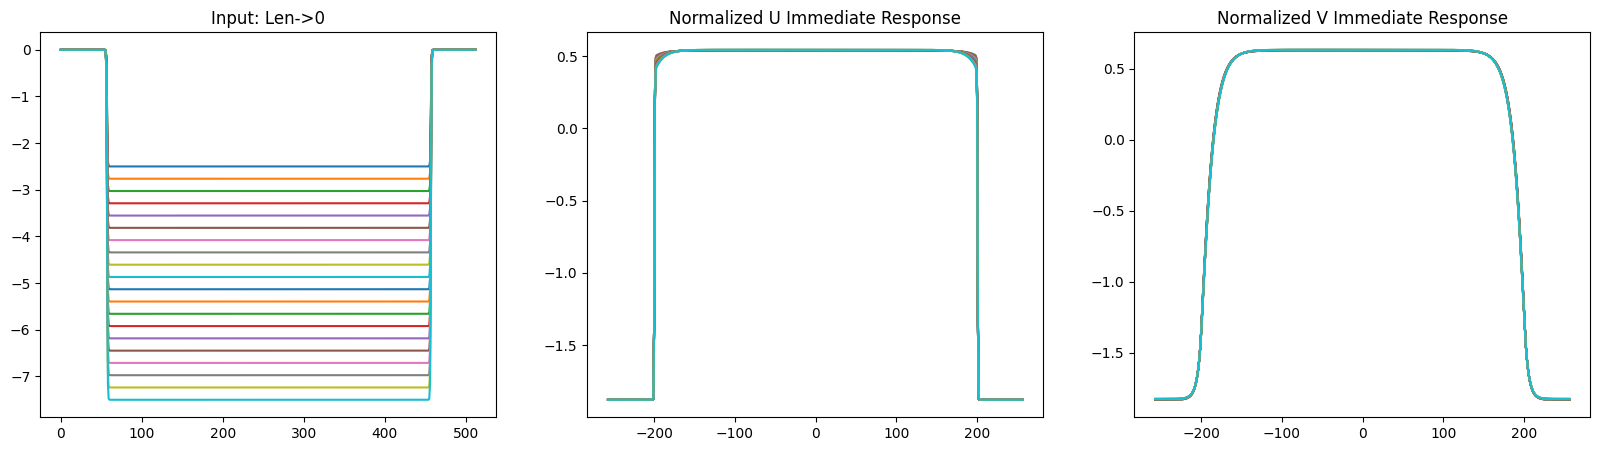

In [308]:
fig, ax = plot_normalized_response(uinits, ress)
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_normalized_graph.png')
#             ,bbox_inches='tight')

In [309]:
gen = iter(ress)

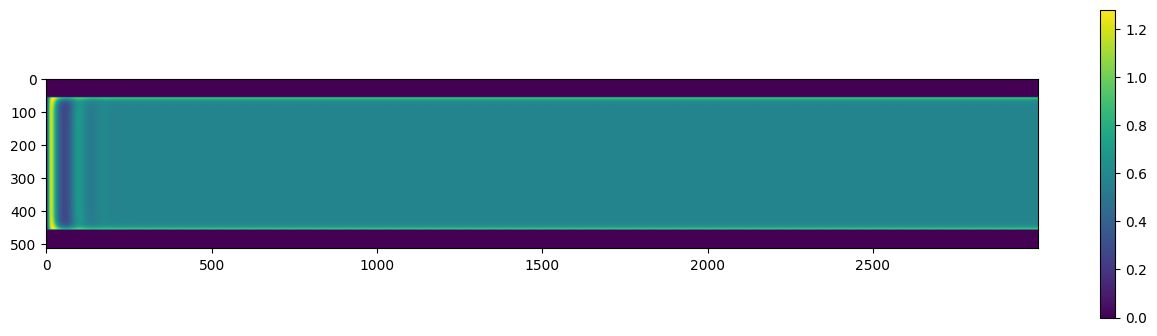

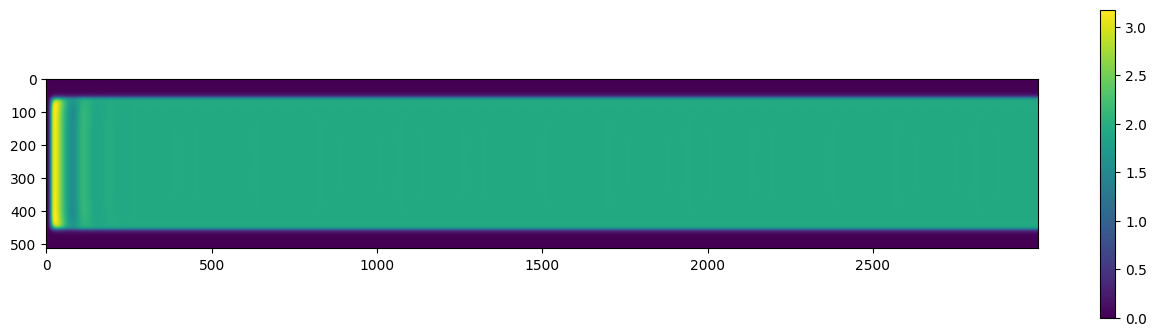

In [313]:
res = next(gen)

fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u.T)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.v.T, vmin=0)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

In [263]:
_ = plt.plot(res.t, res.u[:, param.size])

IndexError: index 513 is out of bounds for axis 1 with size 513

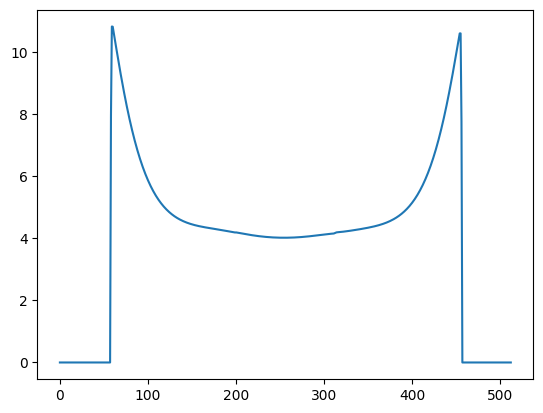

In [229]:
plt.plot(res.u[-1])

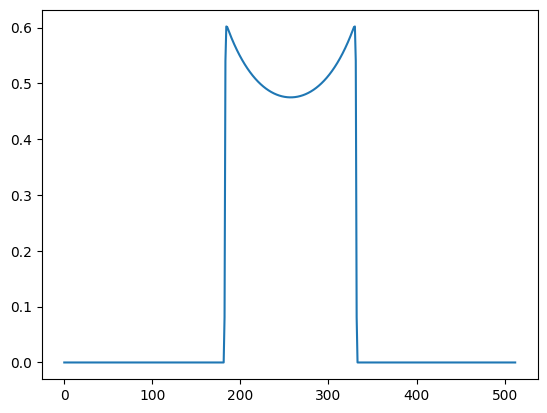

In [538]:
plt.plot(res.v[5])